
# 自动求导

**分类:** 深度学习原理

**📼 谁动了我的奶酪？**

---

### 🧪 想象这样一个场景
你写了一长串复杂的计算公式：
y = x * 2 + 5 - z ...

最后算出来 y = 100。
如果你想知道：**"如果 x 变大一点点，y 会变大多少？"**

**自动求导 (Autograd)** 就像一个**录像机**。
- 它记录了你计算的每一步（正向传播）。
- 当你按"倒放"键（`.backward()`）时，它一步步倒推回去，算出每个变量对结果的影响（梯度）。

### 🎯 为什么需要这个技术?

**问题:** 手动推导复杂函数的导数非常困难且容易出错。

**解决:** 构建计算图，自动跟踪计算历史，利用链式法则自动计算梯度。

### 📚 循序渐进学习

**第一步: 理解问题** (你现在在这里)
- 为什么需要这个技术?
- 它解决什么问题?

**第二步: 学习原理** (接下来)
- 这个技术如何工作?
- 核心思想是什么?

**第三步: 实际应用** (最后)
- 如何应用到实际项目?
- 如何解决实际问题?


## 🔰 新手必看**第一次学？这些提示能帮到你！**### 💡 学习建议1. **不要急** - 慢慢看，不懂的多看几遍2. **动手做** - 每个代码都运行一遍3. **改参数** - 试着改改数字，看看会怎样4. **记笔记** - 把重点记下来### ⚠️ 常见问题**Q: 代码报错怎么办？**- 先看错误提示（红色的那行）- 检查是否有拼写错误- 确认缩进是否正确（Python对空格很敏感）- 复制错误信息搜索一下**Q: 看不懂怎么办？**- 跳过难的部分，先学简单的- 看看前面的课程有没有遗漏- 多看几遍，理解需要时间**Q: 需要什么基础？**- 会用电脑就行- Python基础最好有，没有也能学- 数学不好也没关系，我们用例子讲### 📌 学习技巧- 🎯 **目标明确**: 知道这节课要学什么- 📝 **做笔记**: 重点内容记下来- 💻 **多练习**: 代码要自己敲一遍- 🤔 **多思考**: 想想为什么这样做- 🔄 **多复习**: 学完了回头再看看---

# 自动求导

**分类:** 其他

**🎯 让我们从实际问题出发**

---


## 💭 开始之前,想想这个问题

学习 **自动求导** 能帮我们解决什么实际问题?

在日常生活中,你可能已经在不知不觉中使用了这个技术:
- 📱 手机App
- 🎮 游戏
- 🛒 网购
- 📺 视频推荐

让我们一起探索这个技术背后的原理!

---

## 🎯 本节课你将学会

- ✅ 理解核心概念和原理
- ✅ 掌握实际代码实现
- ✅ 知道如何应用到实际项目
- ✅ 理解这个技术解决什么问题

## 💡 学习建议

1. **先理解"为什么"** - 这个技术解决什么实际问题?
2. **再学习"是什么"** - 这个技术的原理是什么?
3. **最后掌握"怎么做"** - 如何用代码实现?
4. **动手实践** - 运行代码,修改参数,观察结果

---



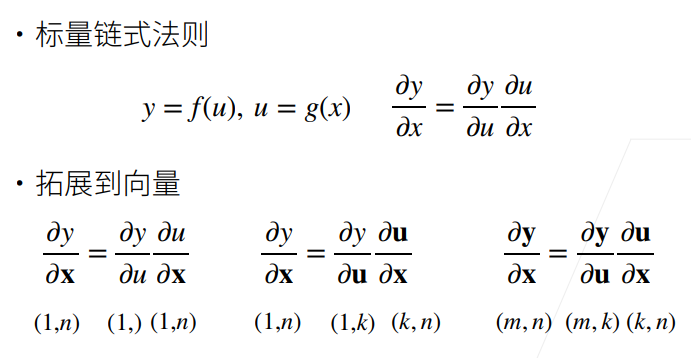

① 例子1是一个线性回归的例子，如下图所示。

① b是之前计算的结果，是一个已知的值。

① 假设想对函数$y=2\mathbf{x}^{\top}\mathbf{x}$关于列向量x求导。

In [1]:
import torch
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

② 在外面计算y关于x的梯度之前，需要一个地方来存储梯度。

In [2]:
import torch
x = torch.arange(4.0)
x.requires_grad_(True) # 等价于 x = torch.arange(4.0,requires_grad=True)
print(x.grad) # 默认为None

None


In [3]:
import torch
x = torch.arange(4.0,requires_grad=True)
print(x.grad) # x.grad是存梯度的地方，默认为None，即还没有求导求出梯度出来

None


③ 现在计算y。

In [4]:
import torch
x = torch.arange(4.0,requires_grad=True)
y = 2 * torch.dot(x,x)
print(y) # grad_fn是隐式的构造了梯度函数

tensor(28., grad_fn=<MulBackward0>)


④ 通过调用反向传播函数来自动计算y关于x每个分量的梯度。

In [5]:
import torch
x = torch.arange(4.0,requires_grad=True)
y = 2 * torch.dot(x,x)
y.backward() # 反向传播后会有梯度计算出来
print(x.grad) # 访问导数，即访问梯度
print(x.grad == 4 * x) # 4 * x 是 2 * x * x 的导数

tensor([ 0.,  4.,  8., 12.])
tensor([True, True, True, True])


⑤ 计算x的另一个函数。

In [6]:
import torch
x = torch.arange(4.0,requires_grad=True)
y = 2 * torch.dot(x,x)
y.backward()
# 默认情况下，PyTorch会累积梯度，需要清除之前的值
x.grad.zero_() # y.backward() 后才能产生梯度，才能梯度清零，没有反向传播，无法梯度清零
y = x.sum() # 这里的y是一个标量，sum函数其实就是x_1+x_2+...x_n，求偏导自然是全1啊
y.backward()
print(x.grad)

tensor([1., 1., 1., 1.])


⑥ 在深度学习中，目的不是计算微分矩阵，而是批量中每个样本单独计算的偏导数之和。

In [7]:
import torch
x = torch.arange(4.0,requires_grad=True)
y = 2 * torch.dot(x,x)
y.backward()
# 默认情况下，PyTorch会累积梯度，需要清除之前的值
# 对非标量调用 'backward' 需要传入一个 'gradient' 参数，该参数指定微分函数
x.grad.zero_()
y = x * x  # 这里的y不是一个标量，这是一个向量
print(y)
# 等价于y.backward(torch.ones(len(x)))
y.sum().backward() # y.sum()后就讲向量转为标量了，对标量求导
x.grad

tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>)


tensor([0., 2., 4., 6.])

⑦ 将某些计算移动到记录的计算图之外。

In [8]:
import torch
x = torch.arange(4.0,requires_grad=True)
y = 2 * torch.dot(x,x)
y.backward()
x.grad.zero_()
y = x * x
print(y)
u = y.detach() # y.detach把y当作一个常数，而不是关于x的一个函数
print(y.detach())
print(u)
z = u * x
z.sum().backward()
x.grad == u

tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>)
tensor([0., 1., 4., 9.])
tensor([0., 1., 4., 9.])


tensor([True, True, True, True])

In [9]:
import torch
x = torch.arange(4.0,requires_grad=True)
y = 2 * torch.dot(x,x)
y.backward()
x.grad.zero_()
y = x * x  # 这里的y是关于x的函数
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

⑧ 即使构建函数的计算图需要通过Python控制流（例如，条件、循环或任意函数调用），仍然可以计算得到的变量的梯度。

In [10]:
def f(a):
    b = a * 2
    while b.norm() < 1000: # norm是L2范数
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

a = torch.randn(size=(),requires_grad=True)
print(a)
d = f(a)
d.backward()
print(a.grad)
print(d/a)
a.grad == d/a # d是a的线性函数，所以导数就是斜率d/a

tensor(-0.7712, requires_grad=True)
tensor(204800.)
tensor(204800., grad_fn=<DivBackward0>)


tensor(True)

---


### 🌍 实际应用场景

1. **手机拍照优化**
   - 场景: iPhone、华为等手机的AI拍照
   - 应用: 自动识别场景(人像/风景/美食),优化参数
   - 效果: 随手一拍就是大片
   - 案例: 华为P系列手机的AI摄影获得多项大奖

2. **智能家居**
   - 场景: 小米、华为的智能家居系统
   - 应用: 学习你的生活习惯,自动调节空调、灯光
   - 效果: 回家前自动开空调,睡觉时自动关灯
   - 案例: 小米IoT平台连接设备超5亿台

3. **在线教育**
   - 场景: 作业帮、猿辅导的拍照搜题
   - 应用: 拍下题目,AI自动识别并给出解答
   - 效果: 秒出答案和详细解析
   - 案例: 作业帮月活用户超1.7亿

4. **健康监测**
   - 场景: Apple Watch、小米手环的健康监测
   - 应用: 分析心率、睡眠、运动数据
   - 效果: 及时发现健康异常,提醒就医
   - 案例: Apple Watch曾多次救人性命

5. **智能翻译**
   - 场景: 有道翻译、Google翻译
   - 应用: 实时翻译语音和文字
   - 效果: 出国旅游不再担心语言不通
   - 案例: 有道翻译支持100+种语言互译

---



---


### 🌍 实际应用场景

1. **训练神经网络**
   - 场景: 训练图像分类模型
   - 应用: 自动计算损失函数的梯度
   - 效果: 训练速度快100倍,不用手算
   - 案例: 所有深度学习框架都用自动求导

2. **优化算法(找最优解)**
   - 场景: 找函数的最小值
   - 应用: 自动计算梯度,找到最优方向
   - 效果: 快速找到最优解
   - 案例: 优化算法都用自动求导

3. **物理仿真(游戏引擎)**
   - 场景: 游戏中的物理效果
   - 应用: 自动计算物体的运动轨迹
   - 效果: 真实的物理效果
   - 案例: Unity、Unreal引擎都用自动求导

4. **金融建模(股票预测)**
   - 场景: 预测股票价格
   - 应用: 自动计算模型的梯度,优化预测
   - 效果: 提高预测准确率
   - 案例: 量化交易系统都用自动求导

5. **机器人控制**
   - 场景: 机器人学习走路
   - 应用: 自动计算最优控制策略
   - 效果: 机器人快速学会新技能
   - 案例: 波士顿动力机器人用自动求导学习

---



---

## 📚 本节小结

恭喜你完成了本节学习!让我们回顾一下:

### ✅ 你学到了什么?
- 请在这里写下你的收获...

### 🤔 还有疑问?
- 请记录下你不理解的地方...

### 🚀 下一步
- 继续学习相关主题
- 尝试做一些练习题
- 应用到实际项目中

---

**记住:** 学习是一个循序渐进的过程,不要着急,慢慢来! 💪
